In [43]:
import numpy as np
import pandas as pd

# Loading the dataset into a DataFrame

In [44]:
#Loading dataset as dataframe
df = pd.read_csv('heart failur classification dataset.csv')
df.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1


In [45]:
df.shape

(299, 14)

In [46]:
#droping the 'unnamed: 0' column from the data-set
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [47]:
df.shape

(299, 13)

In [48]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1


# Handling the null values of the features with SimpleImputer
### Depending on the dataset, we would have handled the null values of the label also if the label consists of null values.

In [49]:
#null value check of the features
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,True,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
#Total null values in each feature
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [51]:
from sklearn.impute import SimpleImputer

# Imputing the serum_sodium column's NaN values with mean strategy
impute1 = SimpleImputer(missing_values = np.nan, strategy = 'mean')

impute1.fit(df[['serum_sodium']])

df['serum_sodium'] = impute1.transform(df[['serum_sodium']])

# Imputing the time column's NaN values with mean strategy
impute2 = SimpleImputer(missing_values = np.nan, strategy = 'mean')

impute2.fit(df[['time']])

df['time'] = impute2.transform(df[['time']])

In [52]:
#Checking if the NaN values are filled or not.
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [53]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,Male,No,4.0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,Male,No,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,Male,Yes,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,Male,No,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,Female,No,8.0,1


# Encoding the categorical features
### Depending on the dataset, we would have encoded the label also if the label is categorical.

In [54]:
#Finding the categorical features and total cateogies of that feature
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [55]:
df['smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [56]:
from sklearn.preprocessing import LabelEncoder

#Encoding the smocking categorical feature
encoder1 = LabelEncoder()

##creating a new column to store the encoded values and comparing the categorical feature with the encoded categorical feature
# df['smoking_encoded'] = encoder1.fit_transform(df['smoking'])
# print(df[['smoking', 'smoking_encoded']].head())

df['smoking'] = encoder1.fit_transform(df['smoking'])
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,Male,0,4.0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,Male,0,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,Male,1,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,Male,0,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,Female,0,8.0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132.000000,Male,1,8.0,1
6,75.0,1,246,0,15,0,127000.00,1.2,137.000000,Male,0,10.0,1
7,60.0,1,315,1,60,0,454000.00,1.1,131.000000,Male,1,10.0,1
8,65.0,0,157,0,65,0,263358.03,1.5,138.000000,Female,0,10.0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133.000000,Male,1,10.0,1


In [57]:
#Encoding the sex categorical feature
encoder2 = LabelEncoder()

##creating a new column to store the encoded values and comparing the categorical feature with the encoded categorical feature
# df['sex_encoded'] = encoder2.fit_transform(df['sex'])
# print(df[['sex', 'sex_encoded']].head())

df['sex'] = encoder2.fit_transform(df['sex'])
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,1,0,4.0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,1,0,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,1,1,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,1,0,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,0,0,8.0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132.000000,1,1,8.0,1
6,75.0,1,246,0,15,0,127000.00,1.2,137.000000,1,0,10.0,1
7,60.0,1,315,1,60,0,454000.00,1.1,131.000000,1,1,10.0,1
8,65.0,0,157,0,65,0,263358.03,1.5,138.000000,0,0,10.0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133.000000,1,1,10.0,1


# Selecting the features and labels

In [58]:
# Selecting the features
features = df.iloc[: , :-1]
features.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,1,0,4.0
1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,1,0,6.0
2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,1,1,7.0
3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,1,0,7.0
4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,0,0,8.0


In [59]:
#selecting the labels
labels = df[['DEATH_EVENT']]
labels

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


# Scaling the features
### Depending on the dataset, we would have scaled the label also if the label values required scaling.

In [60]:
from sklearn.preprocessing import StandardScaler

#Scaling the feature values with StandardScaler
scaler = StandardScaler()
scaler.fit(features)

features_Standard_scaled = scaler.transform(features)

# Splitting the scaled features and the labels into training and testing set. 
# And, Applying Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Using Logistic Regression model

logReg = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(features_Standard_scaled, labels, test_size=0.2, random_state=1)

logReg.fit(x_train, y_train)

logReg_predictions = logReg.predict(x_test)

logReg_score = accuracy_score(y_test, logReg_predictions)

print("Test accuracy with Logistic Regression: {:.2f}".format(logReg_score))

Test accuracy with Logistic Regression: 0.88


C:\Users\DIPTO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Splitting the scaled features and the labels into training and testing set. 
# And, fitting into Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Using Decision Tree Classifier

dt = DecisionTreeClassifier(criterion='entropy',random_state=1)

x_train, x_test, y_train, y_test = train_test_split(features_Standard_scaled, labels, test_size=0.2, random_state=1)

dt.fit(x_train,y_train)

dt_predictions = dt.predict(x_test)

dt_score = accuracy_score(y_test, dt_predictions)

print("Test accuracy with Decision Tree Classifier: {:.2f}".format(dt_score))

Test accuracy with Decision Tree Classifier: 0.85


# Comparing between the two models using bar chart

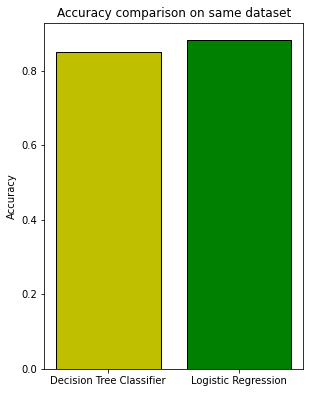

In [63]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([1,1,0.6,1.2])
ax.bar(['Decision Tree Classifier', 'Logistic Regression'], [dt_score, logReg_score], color=['y', 'g'],  edgecolor='black')
ax.set_title('Accuracy comparison on same dataset')
plt.ylabel('Accuracy')
plt.show()